<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#ff0000;font-size:110%;text-align:left">
<a id=toc></a>
<h1 style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-size: 100% auto;background-position: 0px 0px; 
"><span style='color:white'><b>⏳ Coca-Cola Stock Price Prediction - LSTM VS LSTM + Attention
Predictions + RNN AND GRU
</b></span></h1>

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#Model PerformanceModel Performance;font-size:110%;text-align:left">
    
<h2><span style="text-align:center; font-weight:bolder; color:navy">About the data:</span></h2> 
<p>
    
<a id="toc"></a>
About Dataset
Information Related To The Dataset:

**Date:** This column represents the calender date when the data about the stock is recorded.

**Open:** This column represents the first recorded price of the stock for a trading session.

**High:** The high price represents the highest traded price of the stock during a given trading session. It reflects the peak value that the stock reached during the day.

**Low:** The low price is the lowest traded price of the stock during a specific trading session. It indicates the minimum value that the stock reached during the day.

**Close:** The closing price is the last traded price of the stock at the end of a trading session. It reflects the final value at which the stock was traded before the market closes.

**Adj Close(Adjusted Close):** The adjusted closing price accounts for corporate actions, such as dividends, stock splits, and new stock offerings, that may affect the stock's price but are not directly related to its performance. The adjusted close is often used to assess the stock's performance over time.

**Volume:** Volume represents the total number of shares traded during a specific time period. It gives an indication of the level of market activity and liquidity for that stock. High volume often suggests increased investor interest, while low volume may indicate less active trading.

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#Model PerformanceModel Performance;font-size:110%;text-align:left">
    
<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2> 
<p>
    
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Data Loading](#2)
- [3. Data Exploration](#3) 
- [4. EDA](#4)  
- [5. Modeling and Evaluation](#5)      
- [6. LSTM](#6)
- [7. LSTM + Attention](#7)
- [8. RNN](#8)
- [9. GRU](#9)      
- [10.Prediction Evaluation ](#10)

<a name="1"></a>
# **<h1 id="1" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Import Libraries</h1>**

In [1]:
pip install keras_self_attention

  Preparing metadata (setup.py) ... - done
  Created wheel for keras_self_attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=37003a07d1d3f1f004dfdb2aecb8f4dff46ffcd800c96ff72053bc1be08b18ef
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras_self_attention
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as smi
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN,GRU
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.initializers import HeNormal
from keras.optimizers import Adam

<a name="2"></a>
# **<h1 id="2" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Loading The Data</h1>**

In [3]:
df = pd.read_csv('/kaggle/input/coca-cola-stock-price/KO.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.048145,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.047072,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.047430,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.046357,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.045881,2035200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15589 entries, 0 to 15588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15589 non-null  object 
 1   Open       15589 non-null  float64
 2   High       15589 non-null  float64
 3   Low        15589 non-null  float64
 4   Close      15589 non-null  float64
 5   Adj Close  15589 non-null  float64
 6   Volume     15589 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 852.6+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15589.000000,15589.000000,15589.000000,15589.000000,15589.000000,1.558900e+04
mean,17.471842,17.613457,17.326797,17.475785,12.222739,9.215234e+06
std,18.424374,18.557859,18.285563,18.425274,15.662293,7.941726e+06
min,0.192708,0.193359,0.182292,0.192057,0.035643,7.680000e+04
25%,0.875000,0.882813,0.869792,0.875000,0.231685,2.985600e+06
50%,10.250000,10.343750,10.156250,10.250000,4.885883,7.866000e+06
75%,30.625000,30.937500,30.250000,30.605000,17.404667,1.315200e+07
max,67.000000,67.199997,65.720001,66.209999,62.817848,1.241690e+08


<a name="3"></a>
# **<h1 id="3" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Data Exploration</h1>**

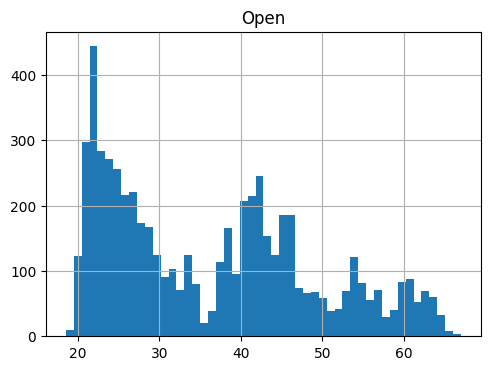

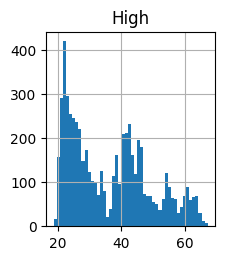

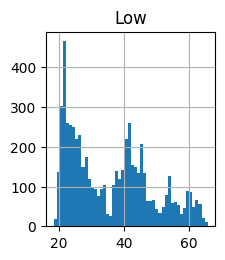

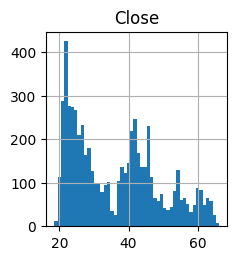

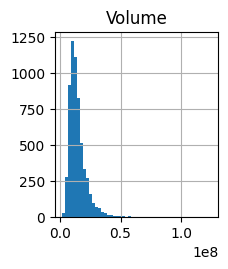

In [6]:
df_plot = df[df['Date'] >= '2000-01-01']

plt.figure(figsize=(14, 7))
for i, column in enumerate(['Open', 'High', 'Low', 'Close', 'Volume']):
    plt.subplot(2, 3, i+1)
    df_plot[column].hist(bins=50)
    plt.title(column)
    plt.tight_layout()
    plt.show()

In [7]:
# Converting the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [8]:
df.mean()

Open         1.747184e+01
High         1.761346e+01
Low          1.732680e+01
Close        1.747578e+01
Adj Close    1.222274e+01
Volume       9.215234e+06
dtype: float64

In [9]:
df.median()

Open         1.025000e+01
High         1.034375e+01
Low          1.015625e+01
Close        1.025000e+01
Adj Close    4.885883e+00
Volume       7.866000e+06
dtype: float64

In [10]:
df.skew()

Open         0.735480
High         0.732191
Low          0.738448
Close        0.734775
Adj Close    1.409751
Volume       2.132422
dtype: float64

In [11]:
df.shape

(15589, 6)

<a name="4"></a>
# **<h1 id="3" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Exploratory Data Analysis</h1>**

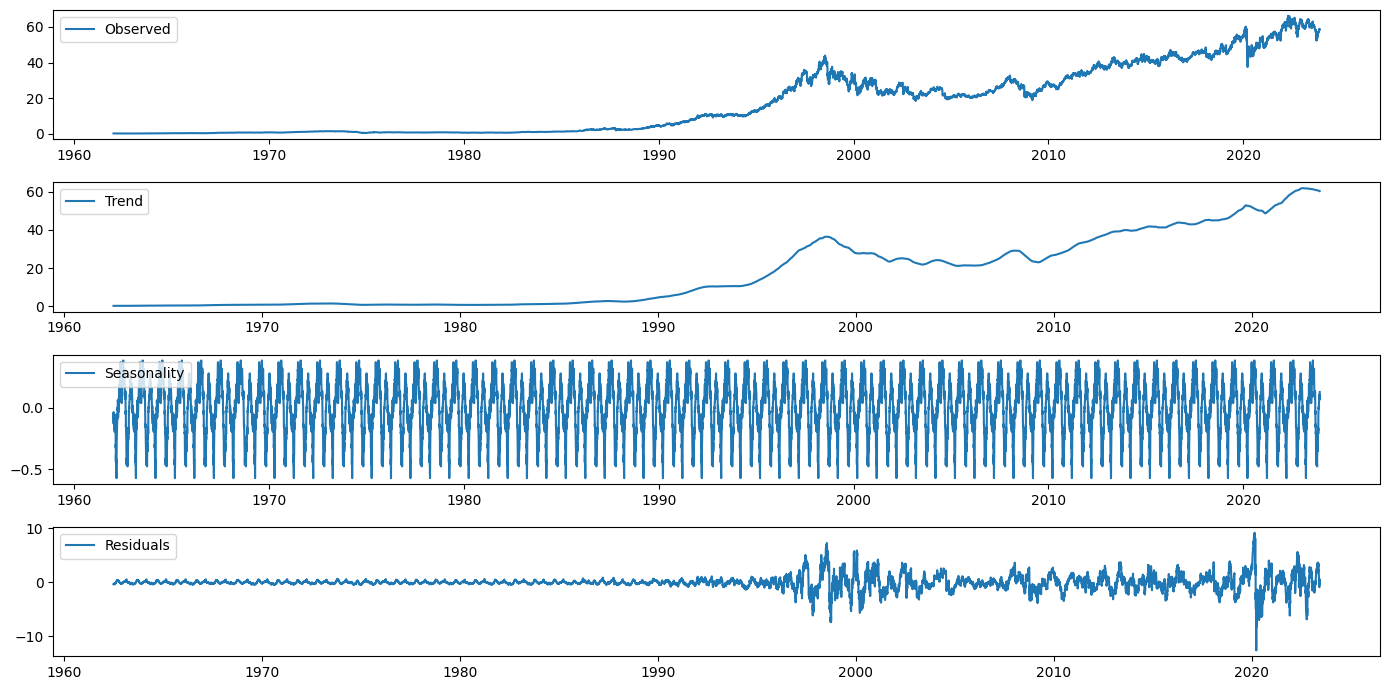

In [12]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252) # Assuming 252 trading days in a year
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

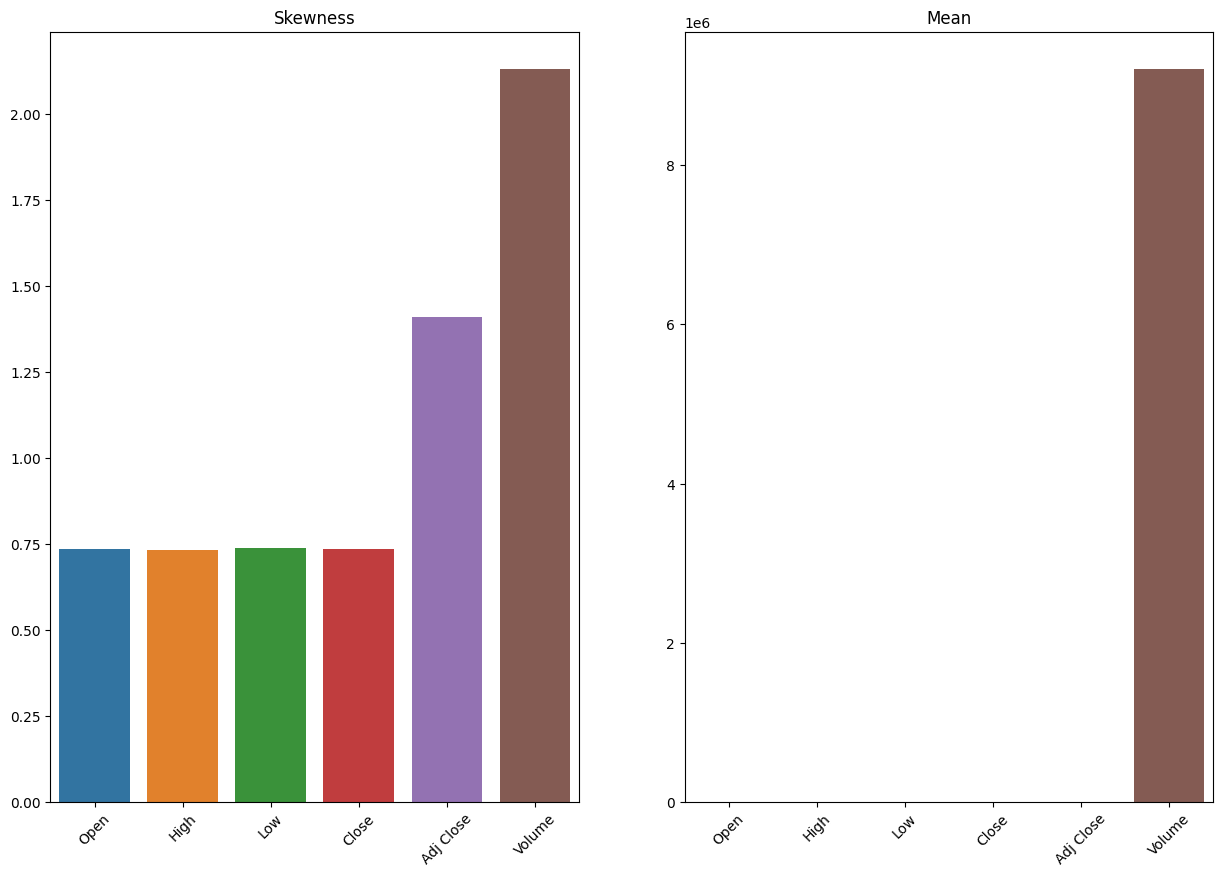

In [13]:
skewness_values = df.skew()
mean_values = df.mean()
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x=skewness_values.index, y=skewness_values.values, ax=ax[0])
ax[0].set_title('Skewness')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x=mean_values.index, y=mean_values.values, ax=ax[1])
ax[1].set_title('Mean')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

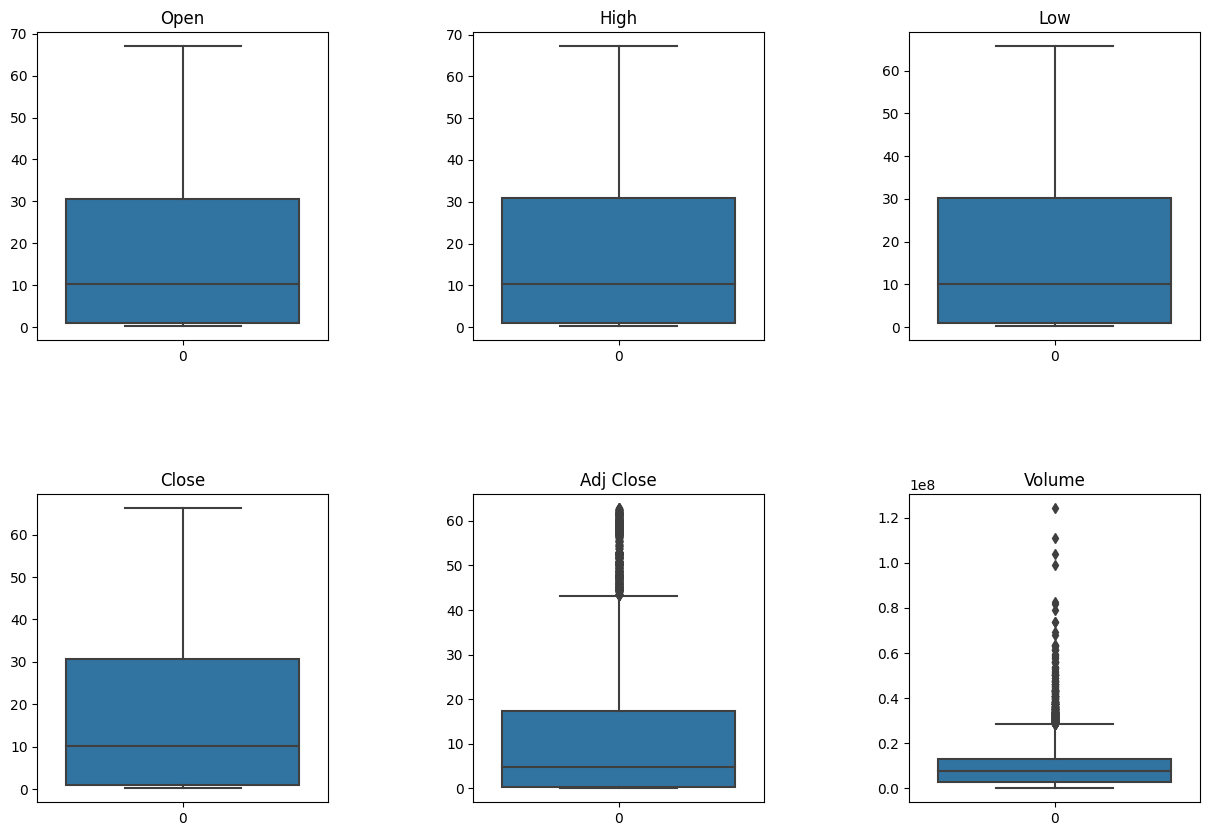

In [14]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row
    sns.boxplot(df[column], ax=ax[current_row, current_column])
    ax[current_row, current_column].set_title(column)

plt.show()

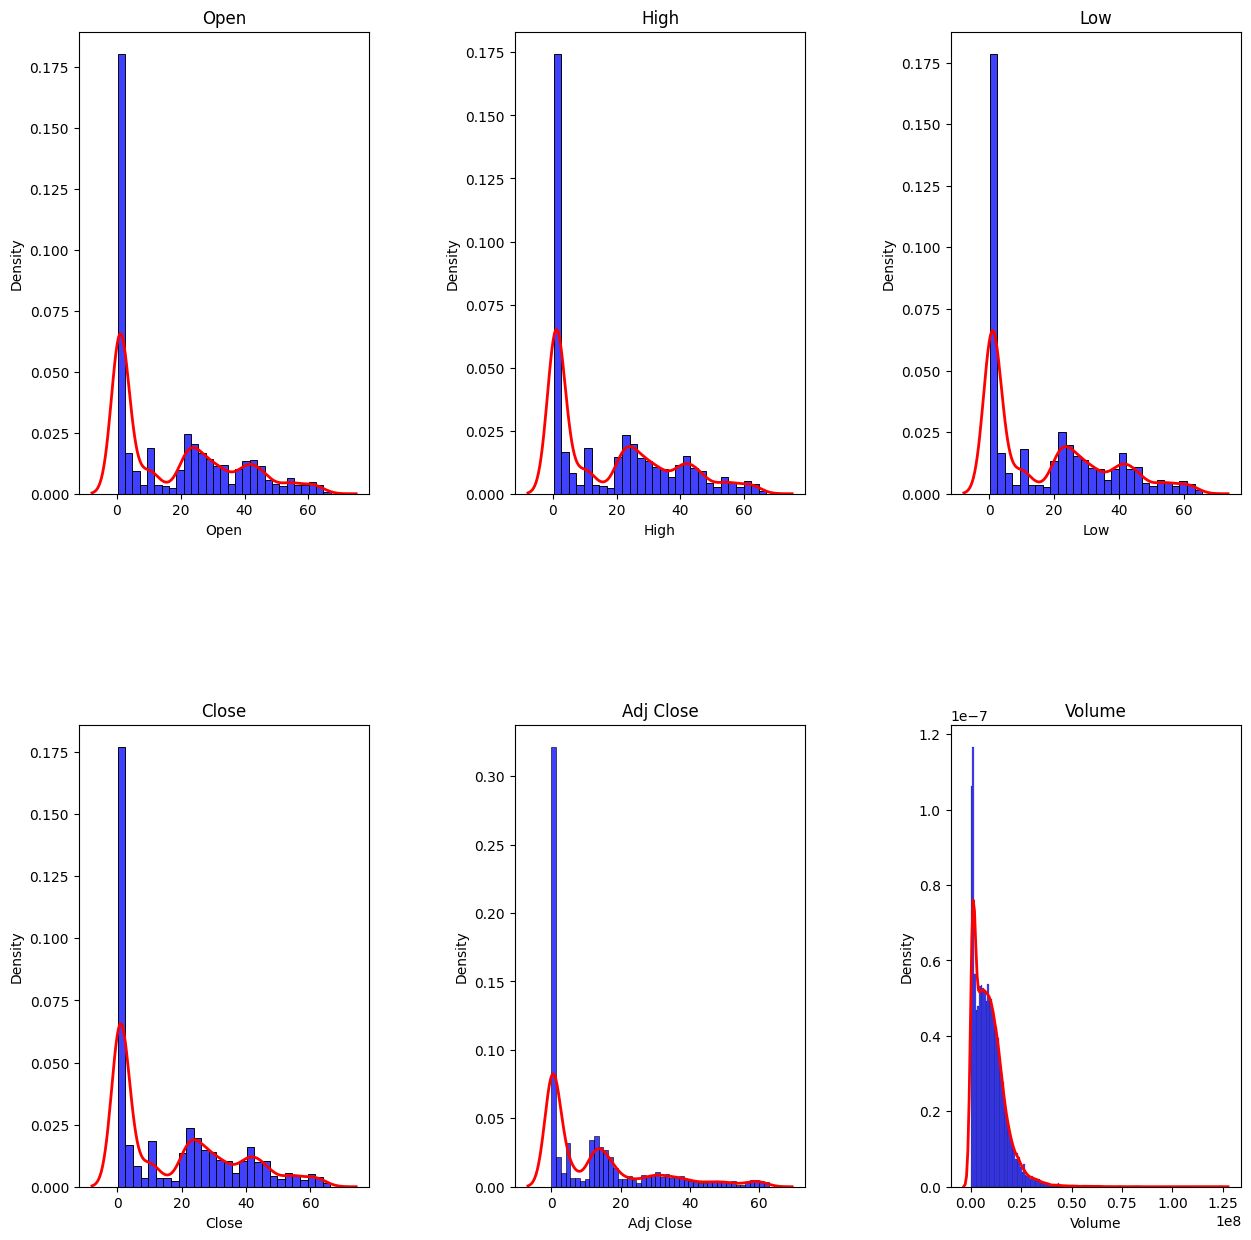

In [15]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row
    
    sns.histplot(df[column], ax=ax[current_row, current_column], color='blue', stat="density", kde_kws={'bw_method': 0.2})
    
    sns.kdeplot(df[column], ax=ax[current_row, current_column], color='red', linewidth=2)
    
    ax[current_row, current_column].set_title(column)

plt.show()

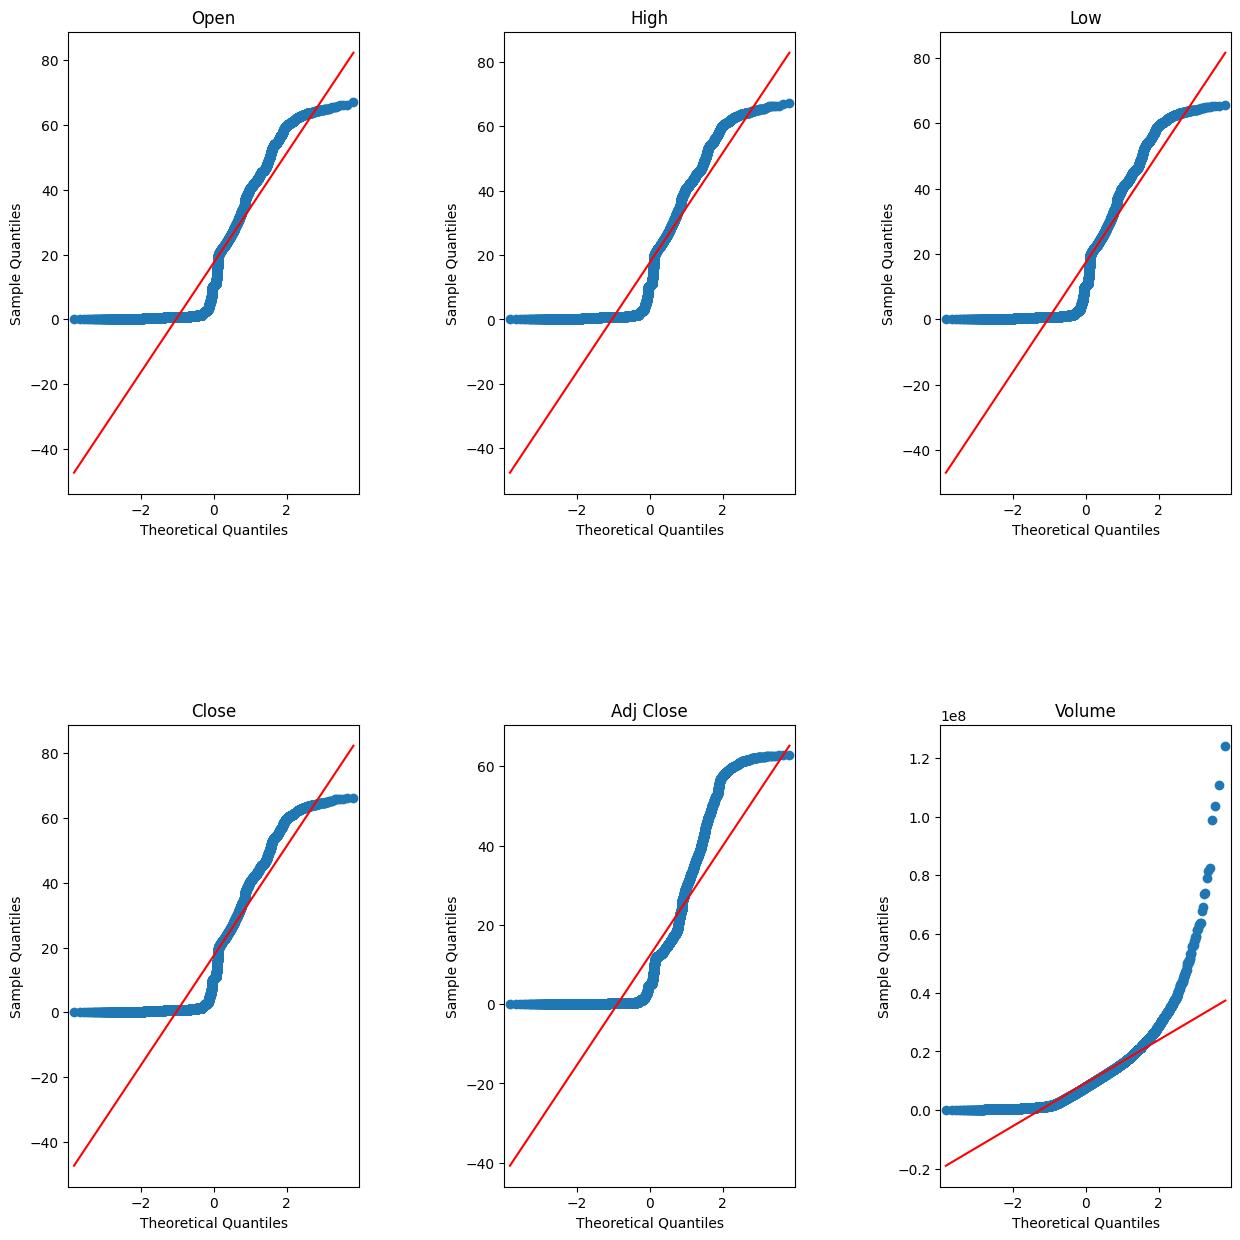

In [16]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row
    
    smi.qqplot(df[column], ax=ax[current_row, current_column], line="r")
    ax[current_row, current_column].set_title(column)

plt.show()

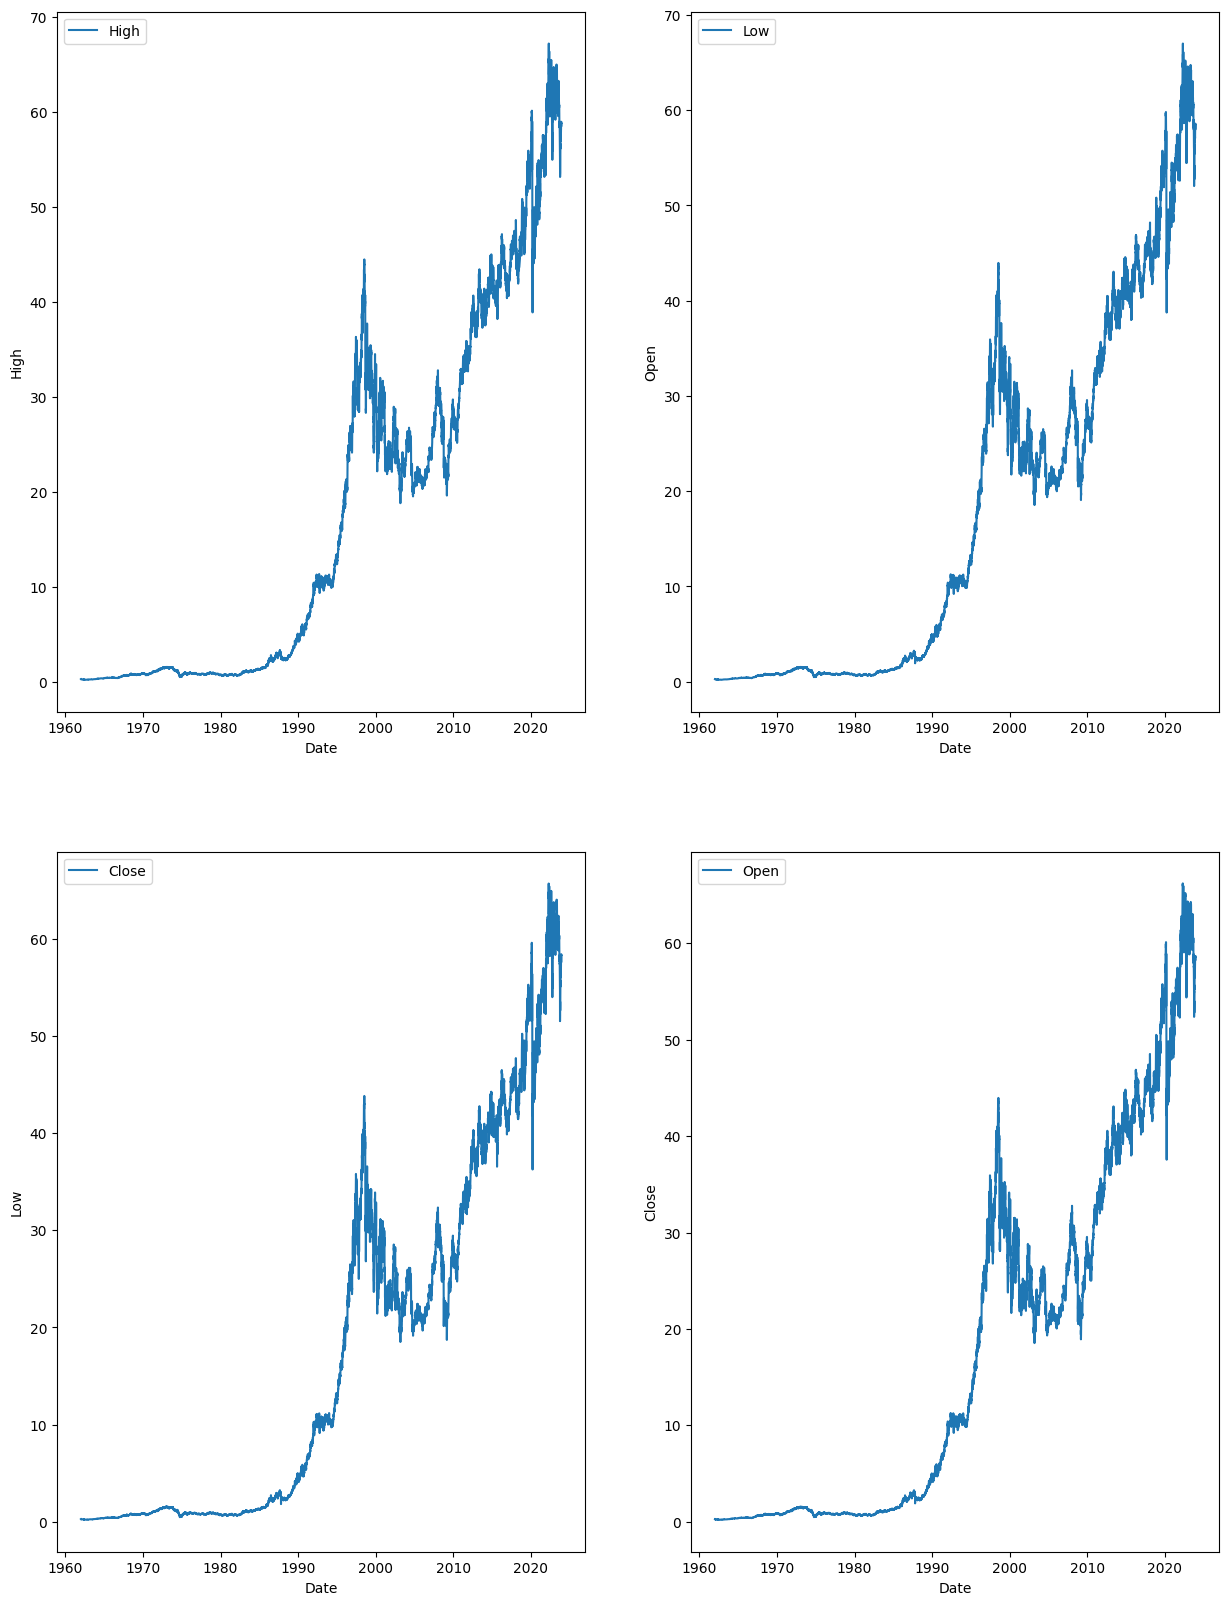

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15, 20))
sns.lineplot(data=df, x='Date', y='High', label='High', ax = ax[0,0])
sns.lineplot(data=df, x='Date', y='Open', label='Low',ax = ax[0,1])
sns.lineplot(data=df, x='Date', y='Low', label='Close',ax = ax[1,0])
sns.lineplot(data=df, x='Date', y='Close', label='Open',ax = ax[1,1])
plt.show()

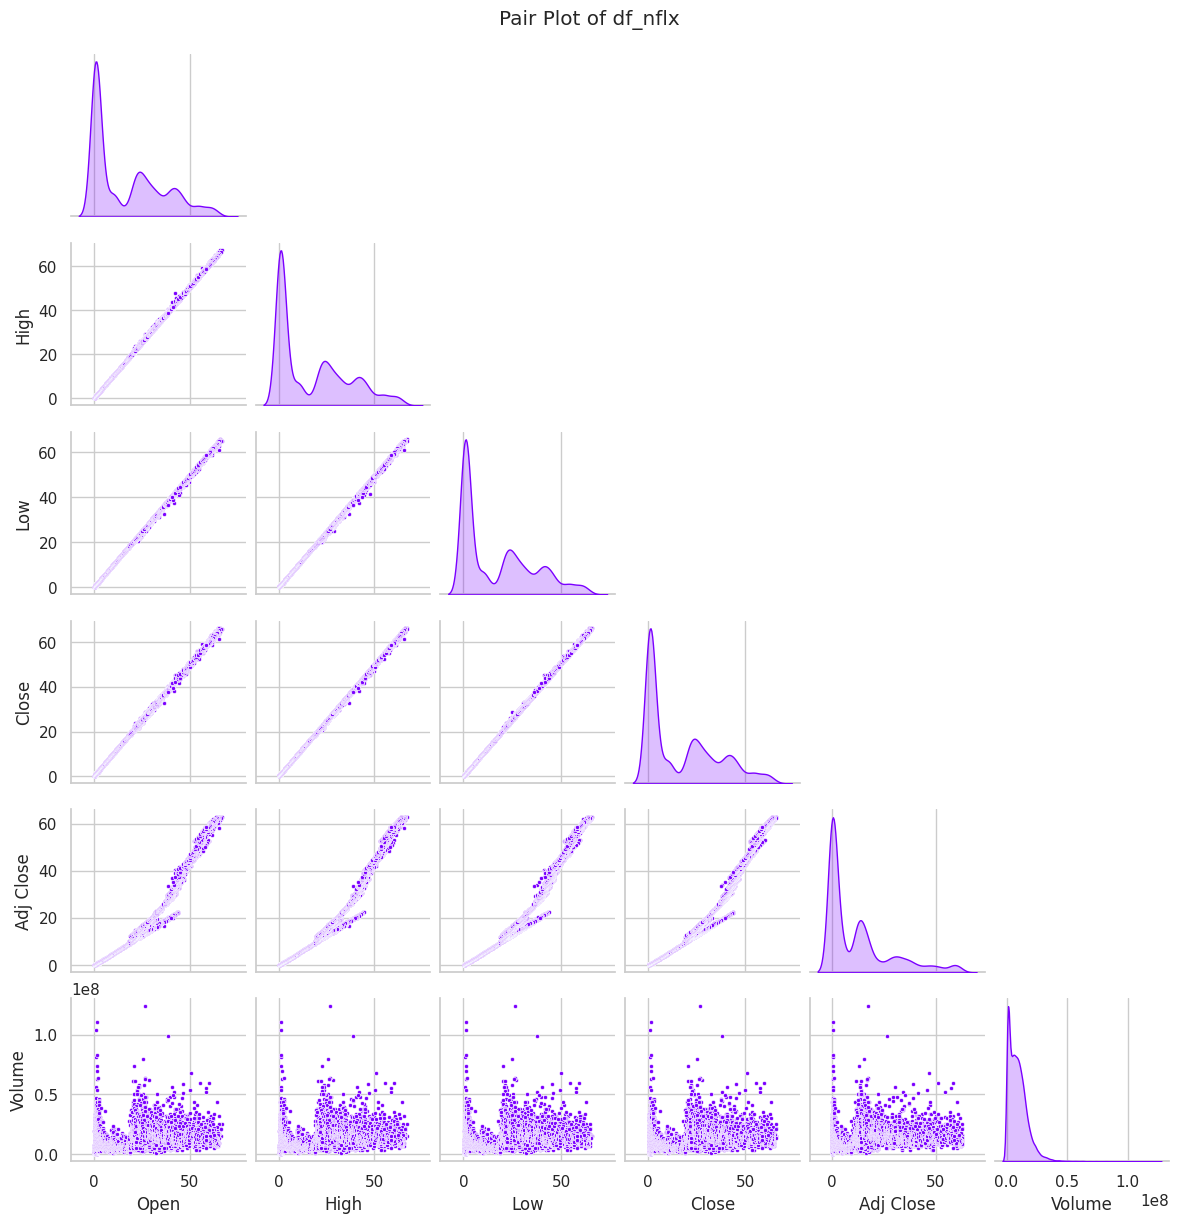

In [18]:
sns.set(style="whitegrid", palette="gist_rainbow_r")

pair_plot = sns.pairplot(df, corner=True, markers='.', diag_kind='kde', height=2)

pair_plot.fig.suptitle("Pair Plot of df_nflx", y=1.02)
plt.show()

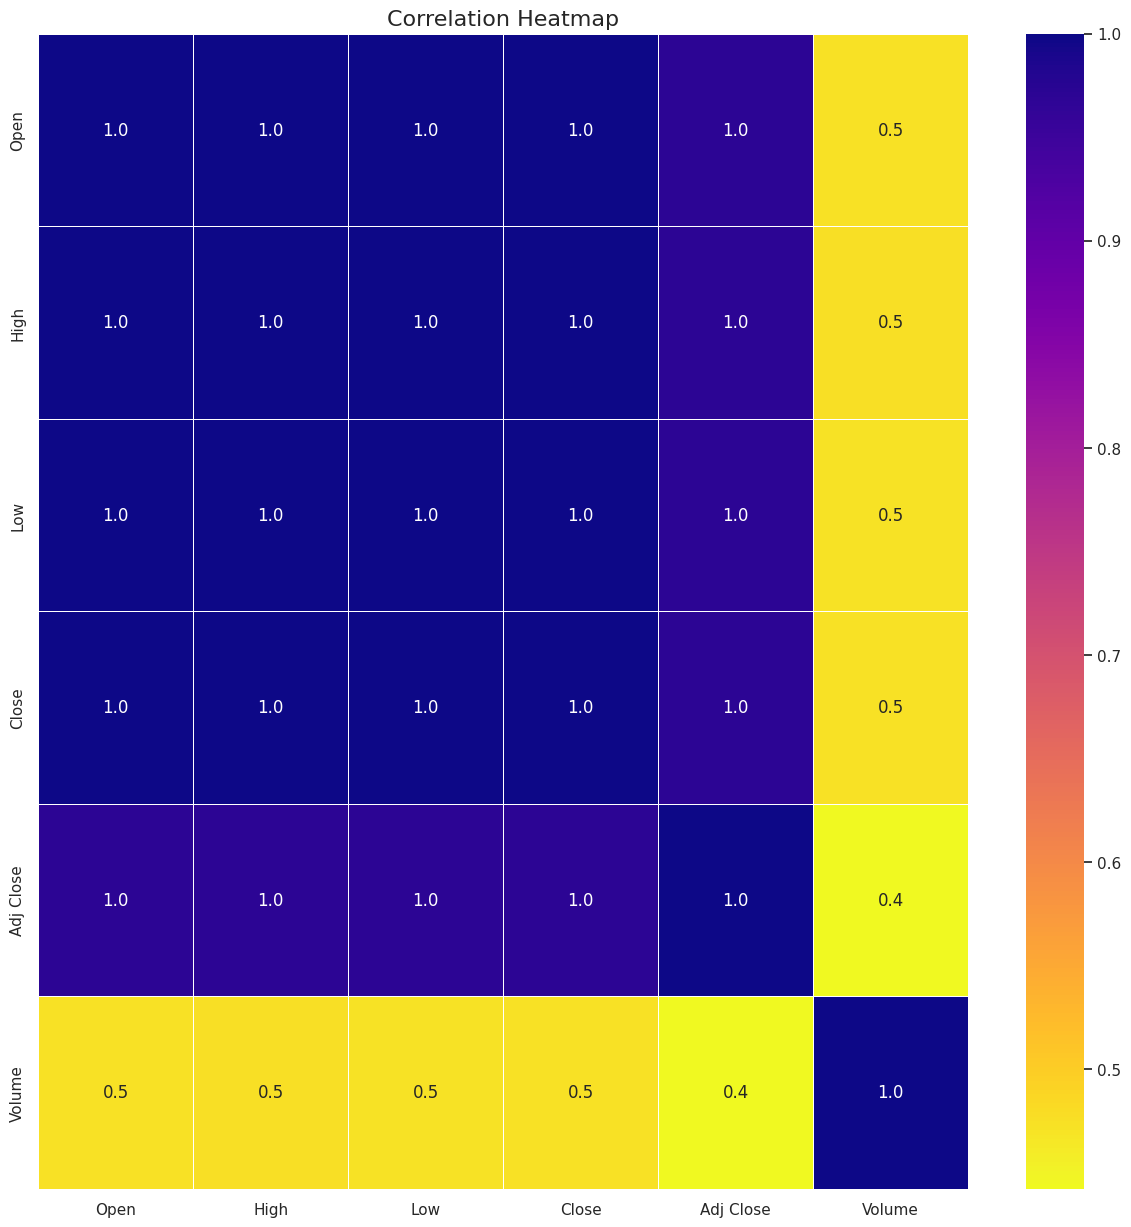

In [19]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='plasma_r', linewidths=.5)
heatmap.set_title("Correlation Heatmap", fontsize=16)
plt.show()

In [20]:
df = df.reset_index()

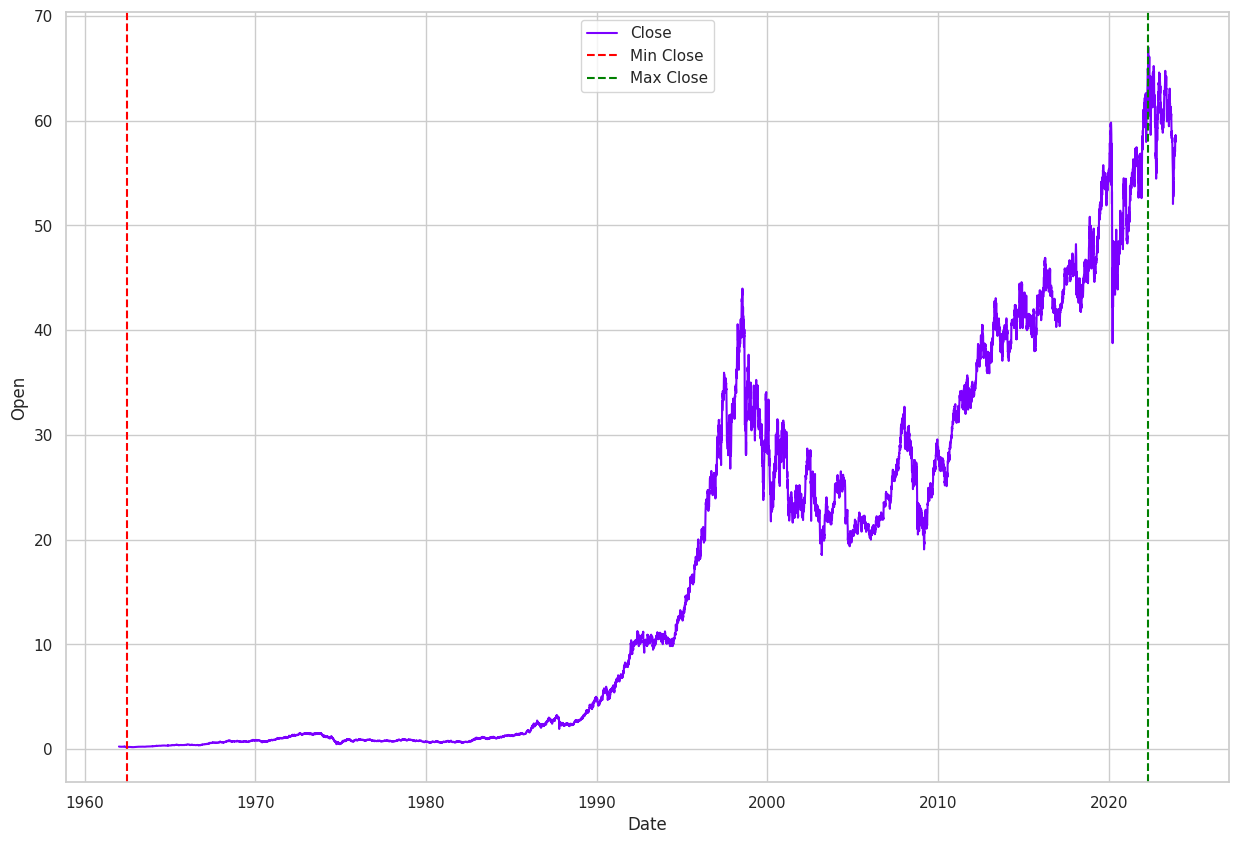

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Open', label='Close')
min_index = df['Close'].idxmin()
max_index = df['Close'].idxmax()
min_date = df.loc[min_index, 'Date']
max_date = df.loc[max_index, 'Date']
plt.axvline(x=min_date, color='r', linestyle='--', label='Min Close')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Close')
plt.legend()
plt.show()

<a name="5"></a>
# **<h1 id="3" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Time Series Modeling and Evaluation</h1>**

In [22]:
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [23]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, 0]
        label = data[i + seq_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [24]:
seq_length = 4
n_samples = len(data_scaled)
sequences, labels = create_sequences(data_scaled, seq_length)
split = int(0.8 * len(sequences))
X_train, y_train = sequences[:split], labels[:split]
X_test, y_test = sequences[split:], labels[split:]

In [25]:
from keras.callbacks import EarlyStopping

<a name="6"></a>
# **<h1 id="3" style="background-color:#4169E1;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">LSTM</h1>**

In [26]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu', input_shape=(seq_length, 1),return_sequences=True))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [27]:
model_lstm.fit(X_train, y_train, epochs=30, batch_size=64,validation_data=(X_test, y_test))
predictions_lstm = model_lstm.predict(X_test)

Epoch 1/30
195/195 [==============================] - 6s 15ms/step - loss: 0.0047 - val_loss: 8.4124e-04
Epoch 2/30
195/195 [==============================] - 3s 13ms/step - loss: 3.5098e-05 - val_loss: 5.6682e-04
Epoch 3/30
195/195 [==============================] - 3s 13ms/step - loss: 3.5222e-05 - val_loss: 4.8545e-04
Epoch 4/30
195/195 [==============================] - 3s 14ms/step - loss: 3.5617e-05 - val_loss: 5.4605e-04
Epoch 5/30
195/195 [==============================] - 2s 13ms/step - loss: 3.9177e-05 - val_loss: 4.1697e-04
Epoch 6/30
195/195 [==============================] - 2s 13ms/step - loss: 3.8460e-05 - val_loss: 4.7102e-04
Epoch 7/30
195/195 [==============================] - 3s 13ms/step - loss: 3.4138e-05 - val_loss: 7.5309e-04
Epoch 8/30
195/195 [==============================] - 2s 13ms/step - loss: 3.6197e-05 - val_loss: 3.3267e-04
Epoch 9/30
195/195 [==============================] - 3s 13ms/step - loss: 3.7270e-05 - val_loss: 3.6752e-04
Epoch 10/30
195/195 [==

In [28]:
predictions__LSTM = scaler.inverse_transform(predictions_lstm)
y_test_actual_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

In [29]:
dates_test = df['Date'].iloc[split + seq_length:]
df_plot_lstm = pd.DataFrame({'Dates': dates_test, 'Real': y_test_actual_LSTM.flatten(), 'Predict': predictions__LSTM.flatten()})
df_plot_lstm.head(3)

,Dates,Real,Predict
12472,2011-07-19,34.660000,33.653011
12473,2011-07-20,34.435001,33.895329
12474,2011-07-21,34.669998,34.180099


<a name="7"></a>
# **<h1 id="3" style="background-color:#4169E1;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">LSTM + ATTENTION</h1>**

In [30]:
from keras.initializers import HeNormal

In [31]:
model_lstm_attention = Sequential()
model_lstm_attention.add(LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True, kernel_initializer=HeNormal()))
model_lstm_attention.add(SeqSelfAttention(attention_activation='relu'))
model_lstm_attention.add(LSTM(50, activation='relu', return_sequences=False, kernel_initializer=HeNormal()))
model_lstm_attention.add(Dense(1, kernel_initializer=HeNormal()))
model_lstm_attention.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [32]:
model_lstm_attention.fit(X_train, y_train, epochs=40, batch_size=32,validation_data=(X_test, y_test))
predictions_scaled_lstm_attention = model_lstm_attention.predict(X_test)

Epoch 1/40
390/390 [==============================] - 9s 13ms/step - loss: 1.9587e-04 - val_loss: 0.0023
Epoch 2/40
390/390 [==============================] - 5s 12ms/step - loss: 3.8051e-05 - val_loss: 4.0190e-04
Epoch 3/40
390/390 [==============================] - 5s 12ms/step - loss: 3.8361e-05 - val_loss: 8.7663e-04
Epoch 4/40
390/390 [==============================] - 5s 12ms/step - loss: 3.6861e-05 - val_loss: 9.5607e-04
Epoch 5/40
390/390 [==============================] - 5s 12ms/step - loss: 3.4142e-05 - val_loss: 5.8220e-04
Epoch 6/40
390/390 [==============================] - 5s 13ms/step - loss: 2.9363e-05 - val_loss: 8.3317e-04
Epoch 7/40
390/390 [==============================] - 5s 12ms/step - loss: 2.8361e-05 - val_loss: 7.4146e-04
Epoch 8/40
390/390 [==============================] - 5s 12ms/step - loss: 2.7410e-05 - val_loss: 8.4718e-04
Epoch 9/40
390/390 [==============================] - 5s 12ms/step - loss: 2.7708e-05 - val_loss: 0.0016
Epoch 10/40
390/390 [======

In [33]:
predictions_lstm_attention = scaler.inverse_transform(predictions_scaled_lstm_attention)
y_test_lstm_attention = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:
df_plot_lstm_attention = pd.DataFrame({'Dates': dates_test, 'Real':y_test_lstm_attention.flatten(), 'Predict': predictions_lstm_attention.flatten()})
df_plot_lstm_attention.head(3)

,Dates,Real,Predict
12472,2011-07-19,34.660000,33.450344
12473,2011-07-20,34.435001,34.684582
12474,2011-07-21,34.669998,34.244461


<a name="8"></a>
# **<h1 id="3" style="background-color:#4169E1;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">RNN</h1>**

In [35]:
# Setting a seed for the HeNormal initializer
he_normal_initializer = HeNormal(seed=42)

model_RNN = Sequential()
model_RNN.add(SimpleRNN(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True, kernel_initializer=he_normal_initializer))
model_RNN.add(SeqSelfAttention(attention_activation='relu', kernel_initializer=he_normal_initializer))
model_RNN.add(SimpleRNN(50, activation='relu', kernel_initializer=he_normal_initializer))
model_RNN.add(Dense(1, kernel_initializer=he_normal_initializer))
model_RNN.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [36]:
model_RNN.fit(X_train, y_train, epochs=30, batch_size=64,validation_data=(X_test, y_test))
predictions_scaled_RNN = model_RNN.predict(X_test)

Epoch 1/30
195/195 [==============================] - 5s 11ms/step - loss: 0.0059 - val_loss: 3.2042e-04
Epoch 2/30
195/195 [==============================] - 2s 9ms/step - loss: 3.3083e-05 - val_loss: 1.1921e-04
Epoch 3/30
195/195 [==============================] - 2s 8ms/step - loss: 3.1233e-05 - val_loss: 2.6457e-04
Epoch 4/30
195/195 [==============================] - 2s 8ms/step - loss: 2.8907e-05 - val_loss: 1.0328e-04
Epoch 5/30
195/195 [==============================] - 2s 8ms/step - loss: 2.5191e-05 - val_loss: 9.7617e-05
Epoch 6/30
195/195 [==============================] - 2s 9ms/step - loss: 4.7441e-05 - val_loss: 0.0016
Epoch 7/30
195/195 [==============================] - 2s 8ms/step - loss: 2.7933e-05 - val_loss: 9.4739e-05
Epoch 8/30
195/195 [==============================] - 2s 9ms/step - loss: 2.2979e-05 - val_loss: 5.4017e-04
Epoch 9/30
195/195 [==============================] - 2s 8ms/step - loss: 2.7564e-05 - val_loss: 5.2896e-04
Epoch 10/30
195/195 [==============

In [37]:
predictions_RNN = scaler.inverse_transform(predictions_scaled_RNN)
y_test_RNN = scaler.inverse_transform(y_test.reshape(-1, 1))

In [38]:
df_plot_RNN = pd.DataFrame({'Dates': dates_test, 'Real': y_test_RNN.flatten(),'Predict': predictions_RNN.flatten()})
df_plot_RNN.head(3)

,Dates,Real,Predict
12472,2011-07-19,34.660000,33.762917
12473,2011-07-20,34.435001,34.519207
12474,2011-07-21,34.669998,34.475773


<a name="9"></a>
# **<h1 id="3" style="background-color:#4169E1;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">GRU</h1>**

In [39]:
model_gru = Sequential()
model_gru.add(GRU(100, activation='relu', input_shape=(seq_length, 1),return_sequences=True))
model_gru.add(GRU(50, activation='relu'))
model_gru.add(Dense(1))
model_gru.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [40]:
model_gru.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_test, y_test))
predictions_scaled_gru = model_gru.predict(X_test)

Epoch 1/30
390/390 [==============================] - 9s 12ms/step - loss: 5.2870e-04 - val_loss: 2.8258e-04
Epoch 2/30
390/390 [==============================] - 4s 10ms/step - loss: 4.5651e-05 - val_loss: 2.2611e-04
Epoch 3/30
390/390 [==============================] - 4s 10ms/step - loss: 5.5667e-05 - val_loss: 1.4091e-04
Epoch 4/30
390/390 [==============================] - 4s 9ms/step - loss: 3.7426e-05 - val_loss: 7.3118e-04
Epoch 5/30
390/390 [==============================] - 4s 10ms/step - loss: 4.5274e-05 - val_loss: 8.6333e-05
Epoch 6/30
390/390 [==============================] - 4s 10ms/step - loss: 4.0189e-05 - val_loss: 2.3718e-04
Epoch 7/30
390/390 [==============================] - 4s 9ms/step - loss: 3.6762e-05 - val_loss: 8.9731e-05
Epoch 8/30
390/390 [==============================] - 4s 10ms/step - loss: 3.7344e-05 - val_loss: 7.6981e-05
Epoch 9/30
390/390 [==============================] - 4s 10ms/step - loss: 3.6318e-05 - val_loss: 7.7813e-05
Epoch 10/30
390/390 [

In [41]:
predictions_GRU = scaler.inverse_transform(predictions_scaled_gru)
y_test_GRU = scaler.inverse_transform(y_test.reshape(-1, 1))

In [42]:
df_plot_GRU = pd.DataFrame({'Dates': dates_test, 'Real': y_test_GRU.flatten(),'Predict': predictions_GRU.flatten()})
df_plot_GRU.head(3)

,Dates,Real,Predict
12472,2011-07-19,34.660000,34.143661
12473,2011-07-20,34.435001,35.393539
12474,2011-07-21,34.669998,34.926693


<a name="10"></a>
# **<h1 id="3" style="background-color:#A52A2A;font-family:newtimeroman;font-size:150%;color:#FDFEFE;text-align:center;border-radius:15px 15px;padding:7px;border:solid 3px #FDFEFE;">Prediction Evaluation</h1>**

In [43]:
mse_lstm = mean_squared_error(df_plot_lstm['Real'], df_plot_lstm['Predict'])
mse_lstm_attention = mean_squared_error(df_plot_lstm_attention['Real'],df_plot_lstm_attention['Predict'])
mse_rnn = mean_squared_error(df_plot_RNN['Real'], df_plot_RNN['Predict'])
mse_GRU = mean_squared_error(df_plot_GRU['Real'], df_plot_GRU['Predict'])

r2_lstm = r2_score(df_plot_lstm['Real'], df_plot_lstm['Predict'])
r2_df_plot_lstm_attention= r2_score(df_plot_lstm_attention['Real'],df_plot_lstm_attention['Predict'])
r2_rnn = r2_score(df_plot_RNN['Real'], df_plot_RNN['Predict'])
r2_GRU = r2_score(df_plot_GRU['Real'], df_plot_GRU['Predict'])

rmse_lstm = mean_squared_error(df_plot_lstm['Real'], df_plot_lstm['Predict'],squared=False)
rmse_rnn = mean_squared_error(df_plot_lstm_attention['Real'],df_plot_lstm_attention['Predict'], squared=False)
rmse_lstm = mean_squared_error(df_plot_RNN['Real'], df_plot_RNN['Predict'],squared=False)
rmse_GRU = mean_squared_error(df_plot_GRU['Real'], df_plot_GRU['Predict'],squared=False)

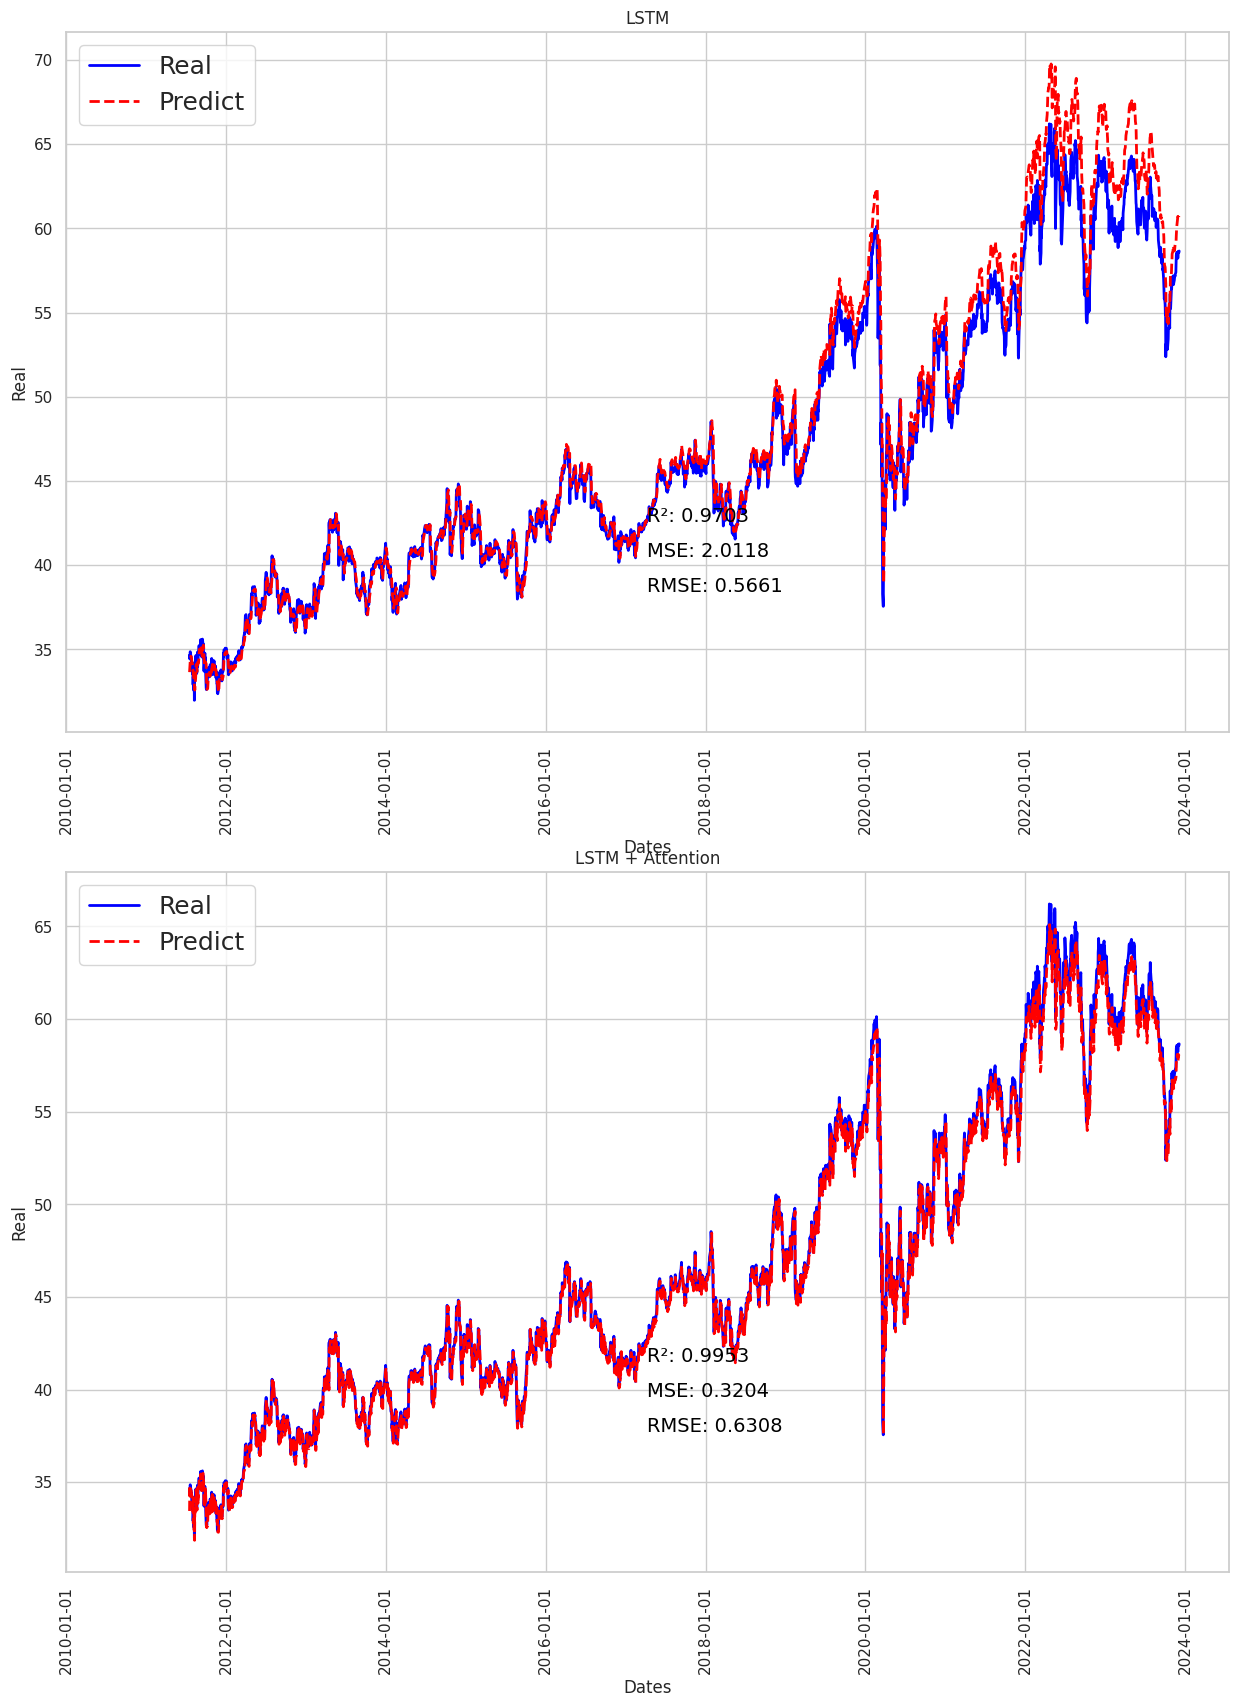

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

sns.lineplot(x='Dates', y='Real', data=df_plot_lstm, label='Real', color='blue', ax=ax[0], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_lstm, label='Predict', color='red', linestyle='dashed', ax=ax[0], linewidth=2)
sns.lineplot(x='Dates', y='Real', data=df_plot_lstm_attention, label='Real', color='blue', ax=ax[1], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_lstm_attention, label='Predict', color='red', linestyle='dashed', ax=ax[1], linewidth=2)

ax[0].text(0.5, 0.30, f'R²: {r2_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.25, f'MSE: {mse_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.20, f'RMSE: {rmse_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[1].text(0.5, 0.30, f'R²: {r2_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.25, f'MSE: {mse_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.20, f'RMSE: {rmse_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)

ax[0].set_title('LSTM')
ax[1].set_title('LSTM + Attention')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

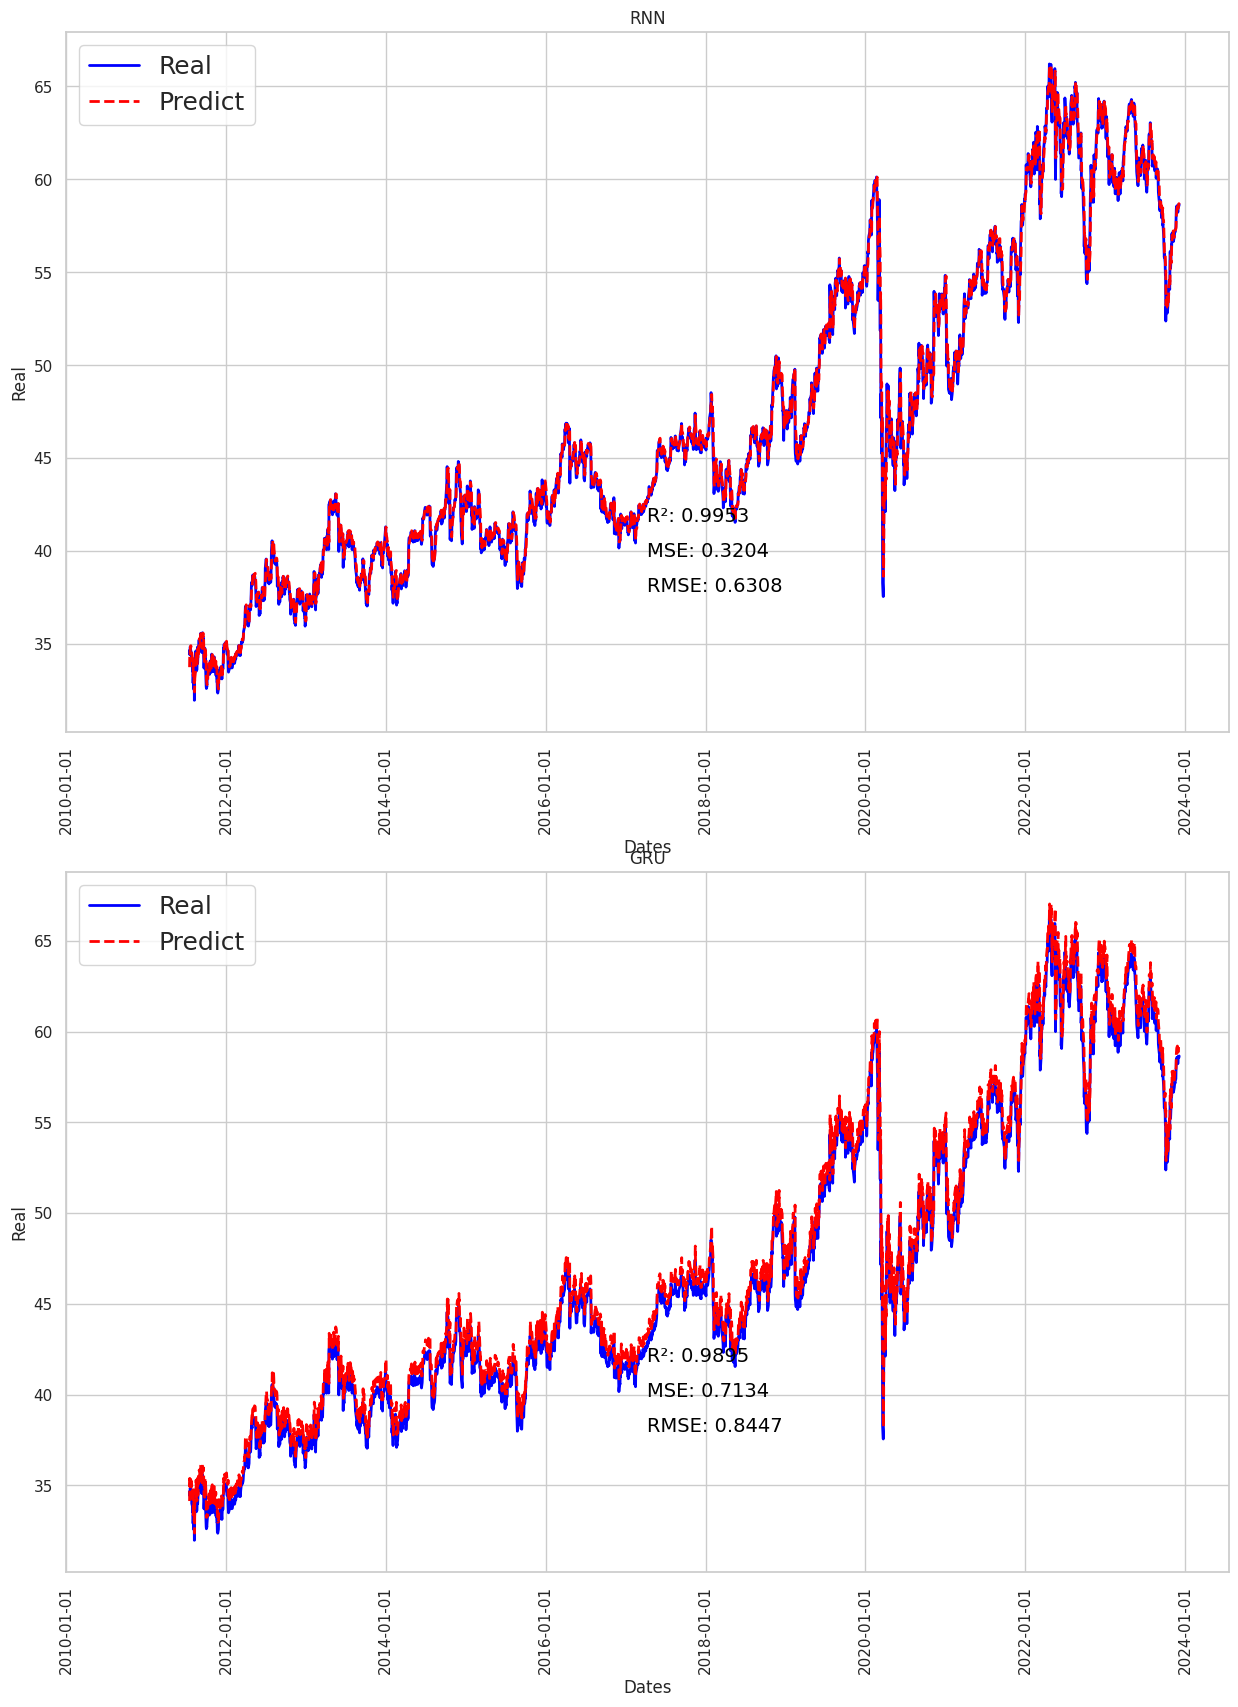

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

sns.lineplot(x='Dates', y='Real', data=df_plot_RNN, label='Real', color='blue', ax=ax[0], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_RNN, label='Predict', color='red', linestyle='dashed', ax=ax[0], linewidth=2)

ax[0].text(0.5, 0.30, f'R²: {r2_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.25, f'MSE: {mse_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.20, f'RMSE: {rmse_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)

sns.lineplot(x='Dates', y='Real', data=df_plot_GRU, label='Real', color='blue', ax=ax[1], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_GRU, label='Predict', color='red', linestyle='dashed', ax=ax[1], linewidth=2)

ax[1].text(0.5, 0.30, f'R²: {r2_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.25, f'MSE: {mse_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.20, f'RMSE: {rmse_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)

ax[1].set_title('GRU')
ax[0].set_title('RNN')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)

ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

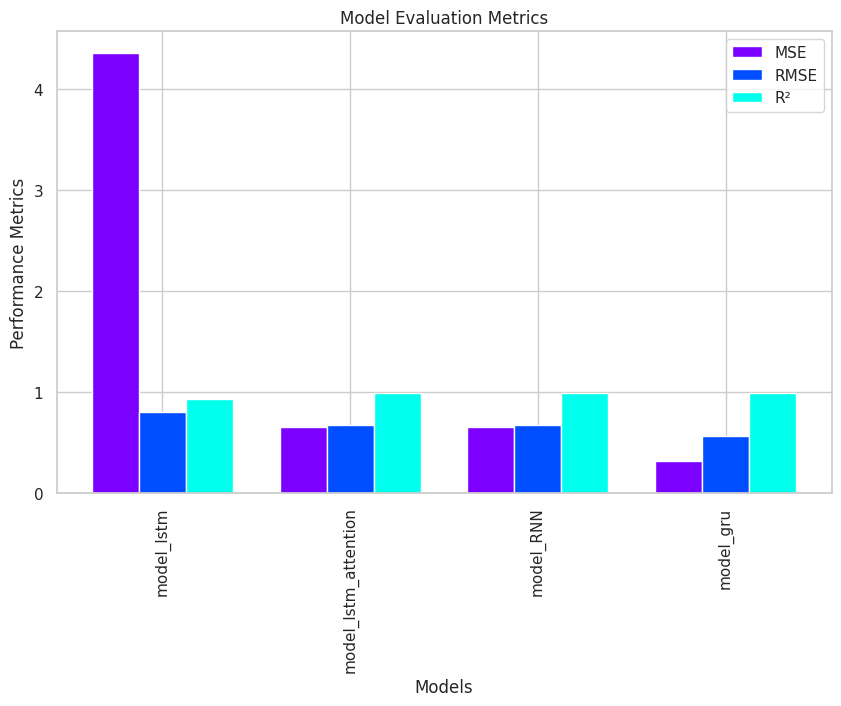

In [46]:
model_names = ['model_lstm', 'model_lstm_attention', 'model_RNN', 'model_gru']
mse_values = [4.3563, 0.6553, 0.6553, 0.3203] 
rmse_values = [0.8095, 0.6750, 0.6750, 0.5660]  
r2_values = [0.9357, 0.9903, 0.9903, 0.9953]    

bar_width = 0.25

bar_positions_mse = np.arange(len(model_names))
bar_positions_rmse = bar_positions_mse + bar_width
bar_positions_r2 = bar_positions_rmse + bar_width

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bar_positions_mse, mse_values, width=bar_width, label='MSE')
ax.bar(bar_positions_rmse, rmse_values, width=bar_width, label='RMSE')
ax.bar(bar_positions_r2, r2_values, width=bar_width, label='R²')

ax.set_xlabel('Models')
ax.set_ylabel('Performance Metrics')
ax.set_title('Model Evaluation Metrics')

ax.set_xticks(bar_positions_rmse)
ax.set_xticklabels(model_names, rotation=90)

ax.legend()
plt.show()

<div style="border-radius:10px;border:#B7B7A4 solid;padding:15px;background-color:#Model PerformanceModel Performance;font-size:110%;text-align:left">
    
<h2><span style="text-align:center; font-weight:bolder; color:navy">UPVOTE THE NOTEBOOK:</span></h2> 
<p>
    
<a id="toc"></a>
IF YOU HAVE MADE IT TILL HERE
    PLEASE DO UPVOTE THE NOTEBOOK
    AND GIVE ME FEEDBACK
    
    THANK YOU